In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import janitor
import json
import warnings

### Importing an extension of the "missing" functions from Pandas

In [3]:
%run utils/u.0.0-pandas_missing_extension.ipynb

/home/ubuntu/anaconda3/lib/python3.11/site-packages/upsetplot/plotting.py:15: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.tight_layout import get_renderer


### Importing DataFrame Functions

In [96]:
%run utils/u.0.1-df_functions.ipynb

### Getting the interim data

In [5]:
arg_di_df = pd.read_csv("../data/interim/WDICSV_INTERIM.csv")
print(arg_di_df.shape)
arg_di_df.info()

(64, 97)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      64 non-null     int64  
 1   EG.ELC.ACCS.ZS            33 non-null     float64
 2   FX.OWN.TOTL.ZS            4 non-null      float64
 3   FX.OWN.TOTL.OL.ZS         4 non-null      float64
 4   FX.OWN.TOTL.40.ZS         4 non-null      float64
 5   FX.OWN.TOTL.PL.ZS         4 non-null      float64
 6   FX.OWN.TOTL.60.ZS         4 non-null      float64
 7   FX.OWN.TOTL.SO.ZS         4 non-null      float64
 8   FX.OWN.TOTL.YG.ZS         4 non-null      float64
 9   per_si_allsi.adq_pop_tot  12 non-null     float64
 10  per_allsp.adq_pop_tot     12 non-null     float64
 11  per_sa_allsa.adq_pop_tot  12 non-null     float64
 12  per_lm_alllm.adq_pop_tot  10 non-null     float64
 13  SE.PRM.TENR               26 non-null     float64
 14  SL.

### Setting initial plots styles

In [6]:
sns.set_style(
    style="whitegrid",
    rc={
        "figure.figsize": (10,10)
    }
)

### First missing variables summaries

In [7]:
arg_di_df.missing.missing_variable_summary().sort_values("pct_missing", ascending=False)

,variable,n_missing,n_cases,pct_missing
38,SE.TER.CUAT.MS.ZS,64,64,100.0
14,SL.TLF.0714.SW.TM,64,64,100.0
39,SE.TER.CUAT.DO.ZS,64,64,100.0
34,SE.SEC.CUAT.PO.ZS,64,64,100.0
32,SE.TER.CUAT.BA.ZS,64,64,100.0
...,...,...,...,...
70,SP.POP.1564.TO.ZS,0,64,0.0
69,SP.POP.0014.TO.ZS,0,64,0.0
46,NY.GDP.MKTP.KD,0,64,0.0
45,IT.MLT.MAIN,0,64,0.0


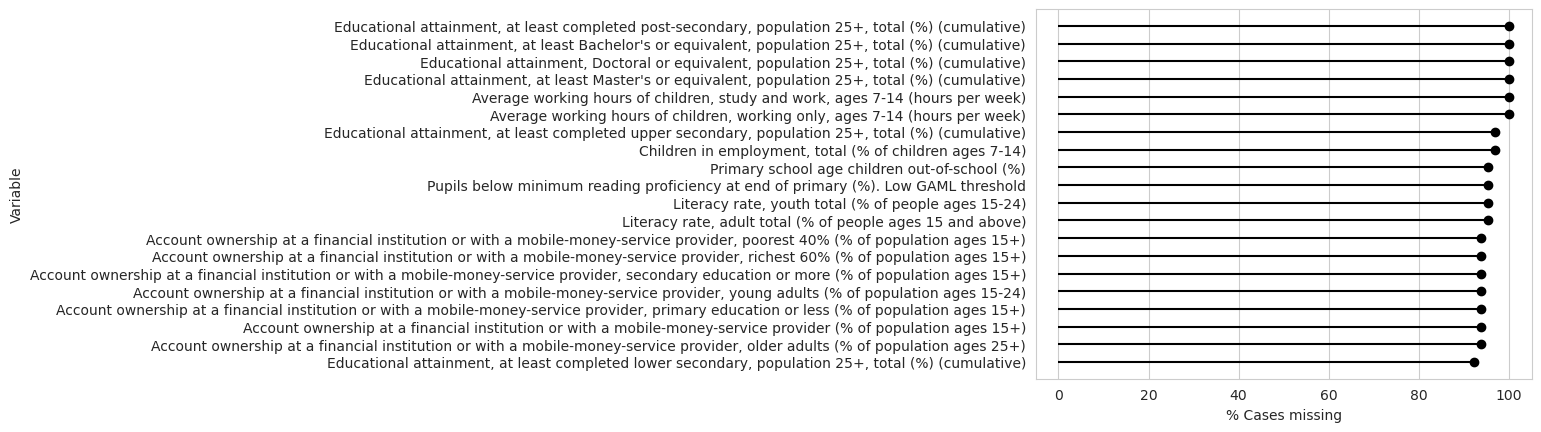

In [30]:
arg_di_df.rename(columns=df_dictionary.set_index("Indicator Code")["Indicator Name"].to_dict(),inplace=False).missing.missing_variable_plot(20)

### Adding one column for years of military dictatorship

In [9]:
arg_di_df["year.of.dictatorship"] = arg_di_df["Year"].apply(lambda year: any(start <= year <= end for start, end in years_of_military_dictatorship))

In [10]:
set_new_dictionary_entry("It was a year of military dictatorship","year.of.dictatorship","year_of_dictatorship")

In [15]:
def plot_count_of_years_of_military_dictatorship(df):
    indicator_name = df_dictionary.loc[df_dictionary["Indicator Code"] == "year.of.dictatorship",["Indicator Name"]].iloc[0,0]
    years_of_dictatorship = pd.DataFrame(df.rename(columns={"year.of.dictatorship": indicator_name}).value_counts(indicator_name,ascending=True))
    years_of_dictatorship = years_of_dictatorship.rename(columns={"count": "Count"}).T
    years_of_dictatorship.plot(kind="barh",stacked=True, color=["green","grey"])

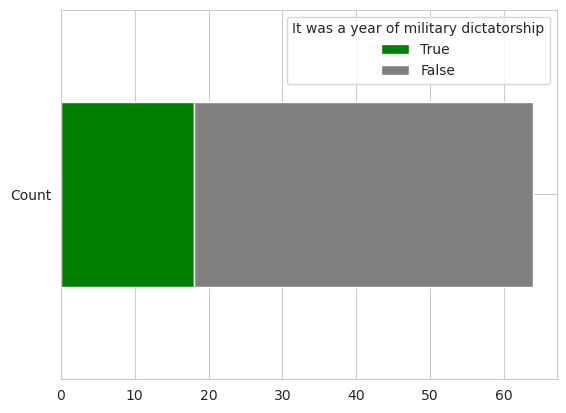

In [16]:
plot_count_of_years_of_military_dictatorship(arg_di_df)

### Exploring missing data of years of military dictatorship

In [ ]:
arg_dictorship_years_df = arg_di_df[arg_di_df['year.of.dictatorship']]
arg_dictorship_years_df.shape

,Year,EG.ELC.ACCS.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.OL.ZS,FX.OWN.TOTL.40.ZS,FX.OWN.TOTL.PL.ZS,FX.OWN.TOTL.60.ZS,FX.OWN.TOTL.SO.ZS,FX.OWN.TOTL.YG.ZS,per_si_allsi.adq_pop_tot,...,SE.TER.ENRR,SE.SEC.DURS,SL.EMP.SELF.ZS,SL.UEM.NEET.ME.ZS,SL.UEM.ADVN.ZS,SL.UEM.BASC.ZS,SL.UEM.INTM.ZS,SL.UEM.TOTL.ZS,SP.URB.TOTL.IN.ZS,year.of.dictatorship
2,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.767,True
3,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.309,True
6,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.888,True
7,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.398,True
8,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.901,True
9,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.394,True
10,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.377590,5.0,NaN,NaN,NaN,NaN,NaN,NaN,78.880,True
11,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.440980,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.321,True
12,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.620810,5.0,NaN,NaN,NaN,NaN,NaN,NaN,79.743,True
13,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.751631,5.0,NaN,NaN,NaN,NaN,NaN,NaN,80.158,True


### Filtering rows and columns with a lot of missing values

Comparing the DataFrame resulting of changing the order of the filters (rows and columns)

In [ ]:
print(filter_by_cols_first(arg_di_df, 0.7).shape) # I obtain diffrent shapes when I change the percentage of missing values
print(filter_by_rows_first(arg_di_df, 0.7).shape)

(54, 25)
(8, 71)


I'll work with the first option due to it has more rows and less columns

In [27]:
arg_di_df_best_cases = filter_by_cols_first(arg_di_df, 0.7)
arg_di_df_best_cases.head()

,Year,IT.MLT.MAIN,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SP.DYN.LE00.IN,IT.CEL.SETS,SH.DTH.IMRT,SH.DTH.MORT,...,SM.POP.REFG,SM.POP.REFG.OR,SP.RUR.TOTL.ZS,SE.PRE.ENRR,SE.PRM.ENRR,SE.SEC.ENRR,SE.TER.ENRR,SE.SEC.DURS,SP.URB.TOTL.IN.ZS,year.of.dictatorship
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,35000.0,NaN,21.120,23.44487,105.769478,44.709621,13.377590,5.0,78.880,True
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,34000.0,NaN,20.679,24.93766,106.752098,45.642109,15.440980,5.0,79.321,True
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,33000.0,NaN,20.257,26.51997,106.286819,47.472710,16.620810,5.0,79.743,True
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,37000.0,NaN,19.842,29.06558,105.710747,49.939709,19.751631,5.0,80.158,True
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,47000.0,NaN,19.433,31.40225,106.127319,52.762390,22.883011,5.0,80.567,False


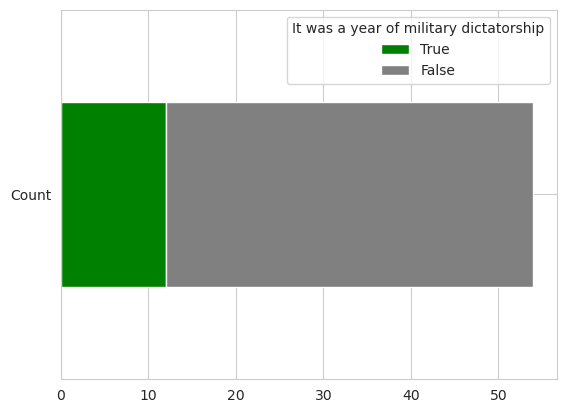

In [28]:
plot_count_of_years_of_military_dictatorship(arg_di_df_best_cases)

### Exploring missing variables

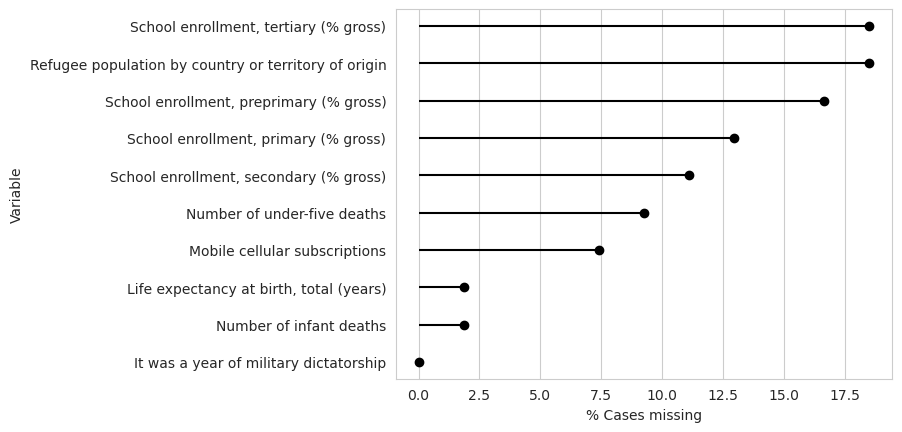

In [31]:
arg_di_df_best_cases.rename(columns=df_dictionary.set_index("Indicator Code")["Indicator Name"].to_dict(),inplace=False).missing.missing_variable_plot(10)

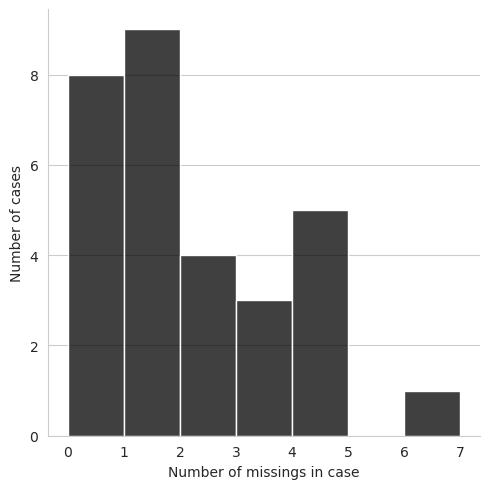

In [41]:
arg_di_df_best_cases.missing.missing_case_plot(30)

#### Getting columns with missing values

In [41]:
columns_with_missing_values = get_columns_with_missing_values(arg_di_df_best_cases)
columns_with_missing_values
[get_indicator_name(item) for item in columns_with_missing_values]

['School enrollment, tertiary (% gross)',
 'Refugee population by country or territory of origin',
 'School enrollment, preprimary (% gross)',
 'School enrollment, primary (% gross)',
 'School enrollment, secondary (% gross)',
 'Number of under-five deaths',
 'Mobile cellular subscriptions',
 'Life expectancy at birth, total (years)',
 'Number of infant deaths']

##### Missing variable runs

This method don't show any pattern

In [42]:
all_missing_variable_run = pd.DataFrame()

for i in columns_with_missing_values:

    missing_variable_run = (
        arg_di_df_best_cases
            .missing
            .missing_variable_run(
                variable=i
            )
    )
    all_runs = missing_variable_run.apply(lambda row: row['run_length'] * -1 if row['is_na'] == "missing" else row['run_length'], axis=1).to_list()
    
    all_missing_variable_run = pd.concat(
        [
            all_missing_variable_run,
            pd.DataFrame({
                'variable': [i],
                'all_runs': [all_runs]
            })
        ],
        ignore_index=True
    )

all_missing_variable_run
    

,variable,all_runs
0,SE.TER.ENRR,"[18, -3, 1, -2, 1, -3, 24, -2]"
1,SM.POP.REFG.OR,"[-10, 44]"
2,SE.PRE.ENRR,"[8, -1, 10, -2, 1, -2, 1, -1, 25, -3]"
3,SE.PRM.ENRR,"[13, -1, 5, -1, 2, -2, 1, -1, 26, -2]"
4,SE.SEC.ENRR,"[19, -1, 2, -2, 1, -1, 26, -2]"
5,SH.DTH.MORT,"[-4, 49, -1]"
6,IT.CEL.SETS,"[1, -4, 49]"
7,SP.DYN.LE00.IN,"[53, -1]"
8,SH.DTH.IMRT,"[53, -1]"


To see more clearly, I plot the missing values

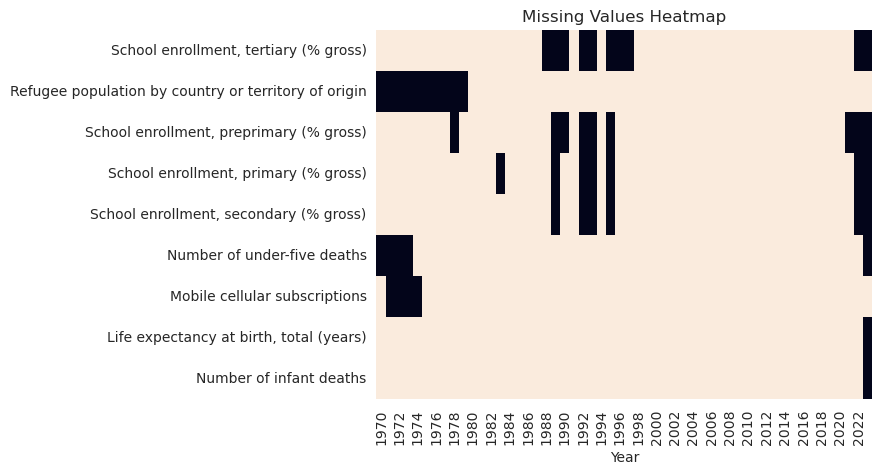

In [ ]:
columns_with_names = [{item: get_indicator_name(item) for item in columns_with_missing_values}][0]
data = arg_di_df_best_cases[columns_with_missing_values + ['Year']].rename(columns=columns_with_names).missing.sort_variables_by_missingness().sort_values(by="Year").set_index('Year')
sns.heatmap(~data.isnull().T,cbar=False,xticklabels="auto")
plt.title("Missing Values Heatmap")
plt.show()

#### Correlation between missing variables

{
  "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
  "SM.POP.REFG.OR": "Refugee population by country or territory of origin",
  "SE.PRE.ENRR": "School enrollment, preprimary (% gross)",
  "SE.PRM.ENRR": "School enrollment, primary (% gross)",
  "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
  "SH.DTH.MORT": "Number of under-five deaths",
  "IT.CEL.SETS": "Mobile cellular subscriptions",
  "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
  "SH.DTH.IMRT": "Number of infant deaths"
}


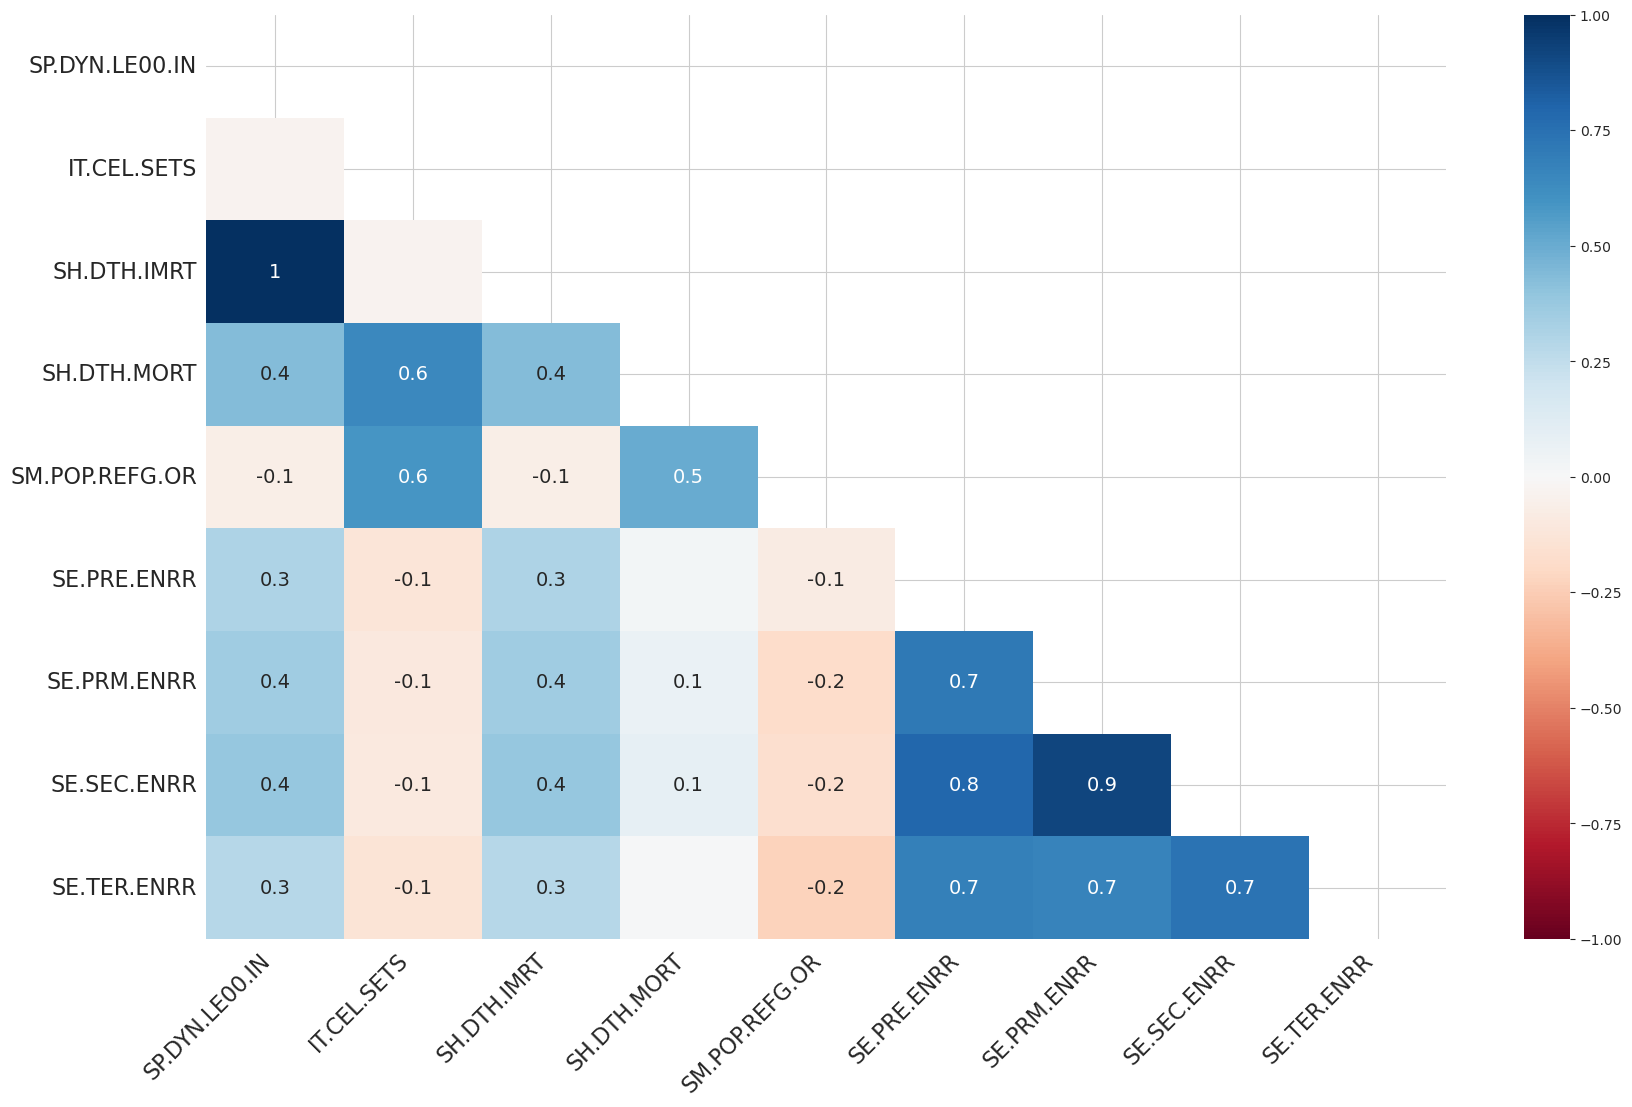

In [ ]:
missingno.heatmap(df=arg_di_df_best_cases)
print(json.dumps(columns_with_names, indent=2))

Missing variables grouped by hierachical clusters with high correlation. Correlation is higher when the branchs are closer. 

<Axes: >

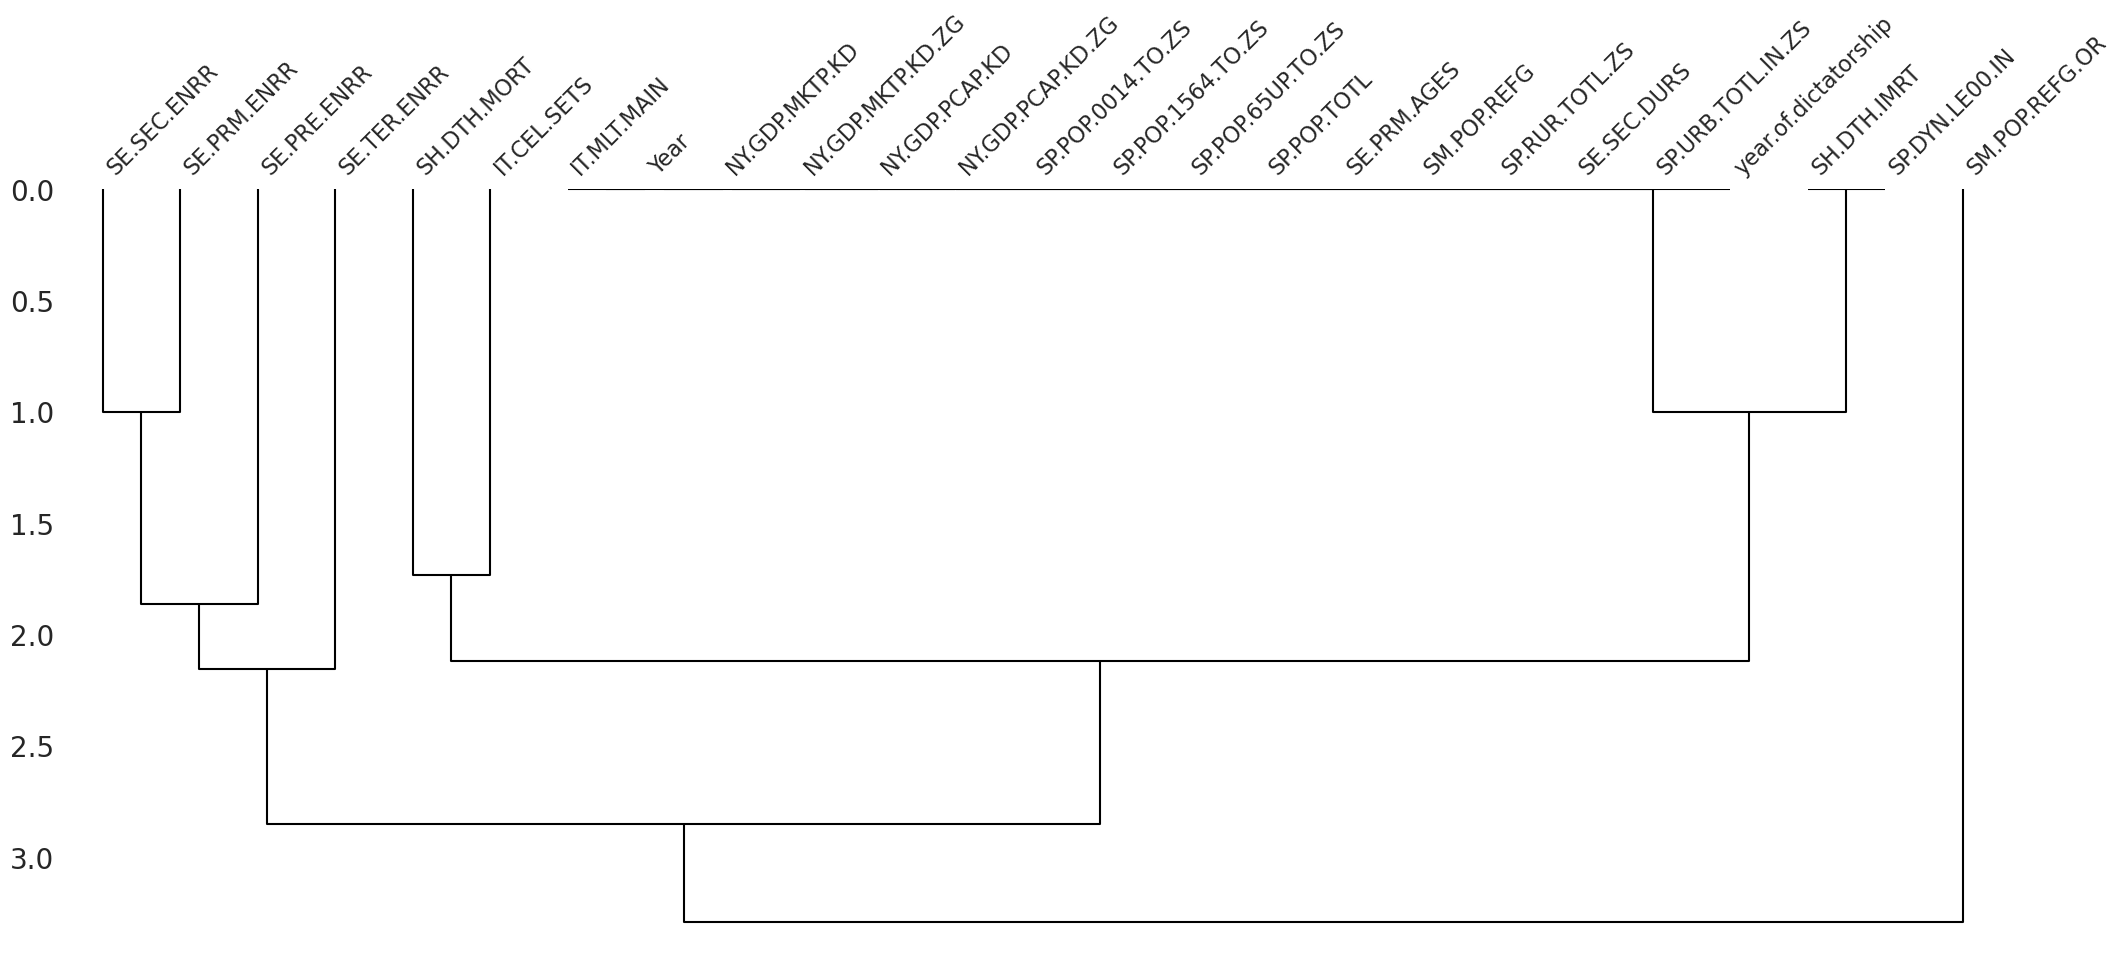

In [54]:
missingno.dendrogram(df=arg_di_df_best_cases)

#### Getting rows with missing values

In [66]:
rows_with_missing_values = arg_di_df_best_cases.set_index('Year').T.isna().sum().sort_values(ascending=False)
rows_with_missing_values = rows_with_missing_values[rows_with_missing_values > 0].index
rows_with_missing_values

Index([2023, 1989, 2022, 1995, 1993, 1992, 1972, 1973, 1971, 1990, 1970, 1974,
       1978, 1997, 1979, 1975, 1996, 1976, 1977, 1983, 2021, 1988],
      dtype='int64', name='Year')

#### Upsetplot

This plot helps identify where data is complete across multiple indicators and where there might be gaps in the dataset.

**Claude AI explanation:**

An UpSet plot shows the relationships between multiple sets and their intersections. In this visualization:

The left bars show the total size of each set (e.g., IT.CEL.SETS, SH.DTH.MORT, etc.)
The bottom dots and connecting lines indicate which sets intersect
The top bars show the size of these intersections

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

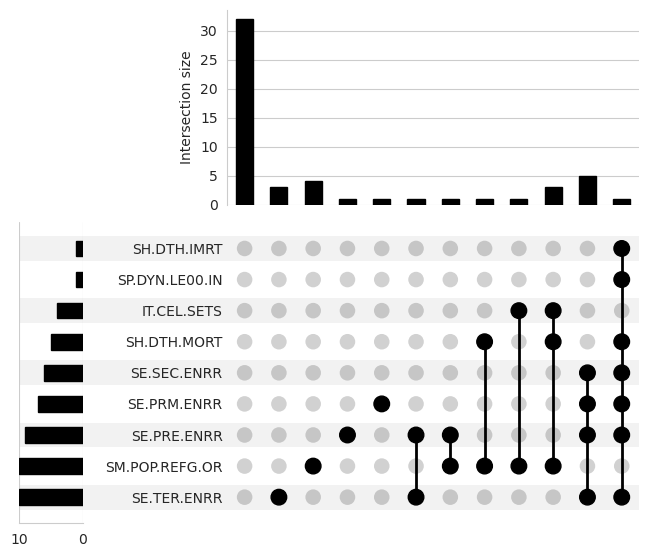

In [ ]:
warnings.simplefilter("ignore") # I will ignore the warnings only for this function
arg_di_df_best_cases[columns_with_missing_values].missing.missing_upsetplot()

##### Shadow matrix

In [56]:
shadow_matrix = arg_di_df_best_cases.missing.bind_shadow_matrix(only_missing = True, true_string="Missing", false_string="Not Missing")
shadow_matrix.head()

,Year,IT.MLT.MAIN,NY.GDP.MKTP.KD,NY.GDP.MKTP.KD.ZG,NY.GDP.PCAP.KD,NY.GDP.PCAP.KD.ZG,SP.DYN.LE00.IN,IT.CEL.SETS,SH.DTH.IMRT,SH.DTH.MORT,...,year.of.dictatorship,SP.DYN.LE00.IN_NA,IT.CEL.SETS_NA,SH.DTH.IMRT_NA,SH.DTH.MORT_NA,SM.POP.REFG.OR_NA,SE.PRE.ENRR_NA,SE.PRM.ENRR_NA,SE.SEC.ENRR_NA,SE.TER.ENRR_NA
10,1970,1287000.0,2.207342e+11,3.045643,9257.895572,1.443200,65.589,0.0,32198.0,NaN,...,True,Not Missing,Not Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
11,1971,1287000.0,2.332236e+11,5.658131,9628.037838,3.998125,65.541,NaN,32685.0,NaN,...,True,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
12,1972,1287000.0,2.370215e+11,1.628417,9630.010366,0.020487,65.923,NaN,33079.0,NaN,...,True,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
13,1973,1287000.0,2.436859e+11,2.811754,9739.416271,1.136093,66.323,NaN,33442.0,NaN,...,True,Not Missing,Missing,Not Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing
14,1974,1287000.0,2.571710e+11,5.533804,10105.049508,3.754160,66.563,NaN,33629.0,40082.0,...,False,Not Missing,Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing


Getting descriptive statistics of a variable grouped by  _NA variables

In [74]:
list = [shadow_matrix.groupby(item+"_NA")[arg_di_df_best_cases.columns[0]].describe() for item in columns_with_missing_values]
list

[                count         mean        std     min      25%     50%  \
 SE.TER.ENRR_NA                                                           
 Missing          10.0  1998.500000  12.989312  1988.0  1990.50  1994.0   
 Not Missing      44.0  1996.045455  16.389098  1970.0  1980.75  1999.5   
 
                     75%     max  
 SE.TER.ENRR_NA                   
 Missing         1996.75  2023.0  
 Not Missing     2010.25  2021.0  ,
                    count    mean        std     min      25%     50%      75%  \
 SM.POP.REFG.OR_NA                                                               
 Missing             10.0  1974.5   3.027650  1970.0  1972.25  1974.5  1976.75   
 Not Missing         44.0  2001.5  12.845233  1980.0  1990.75  2001.5  2012.25   
 
                       max  
 SM.POP.REFG.OR_NA          
 Missing            1979.0  
 Not Missing        2023.0  ,
                 count         mean        std     min     25%     50%     75%  \
 SE.PRE.ENRR_NA             

#### Plotting variables separated by _NA variables

/home/ubuntu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


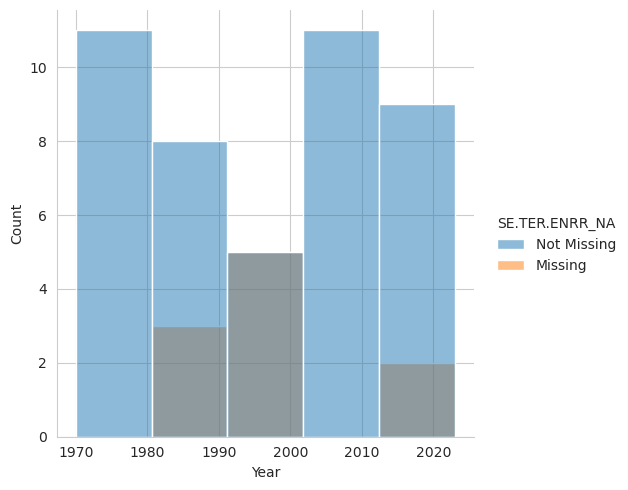

In [ ]:
sns.displot(data=shadow_matrix,x=arg_di_df_best_cases.columns[0],kind="hist",hue=columns_with_missing_values[0]+"_NA",bins=5)

/home/ubuntu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


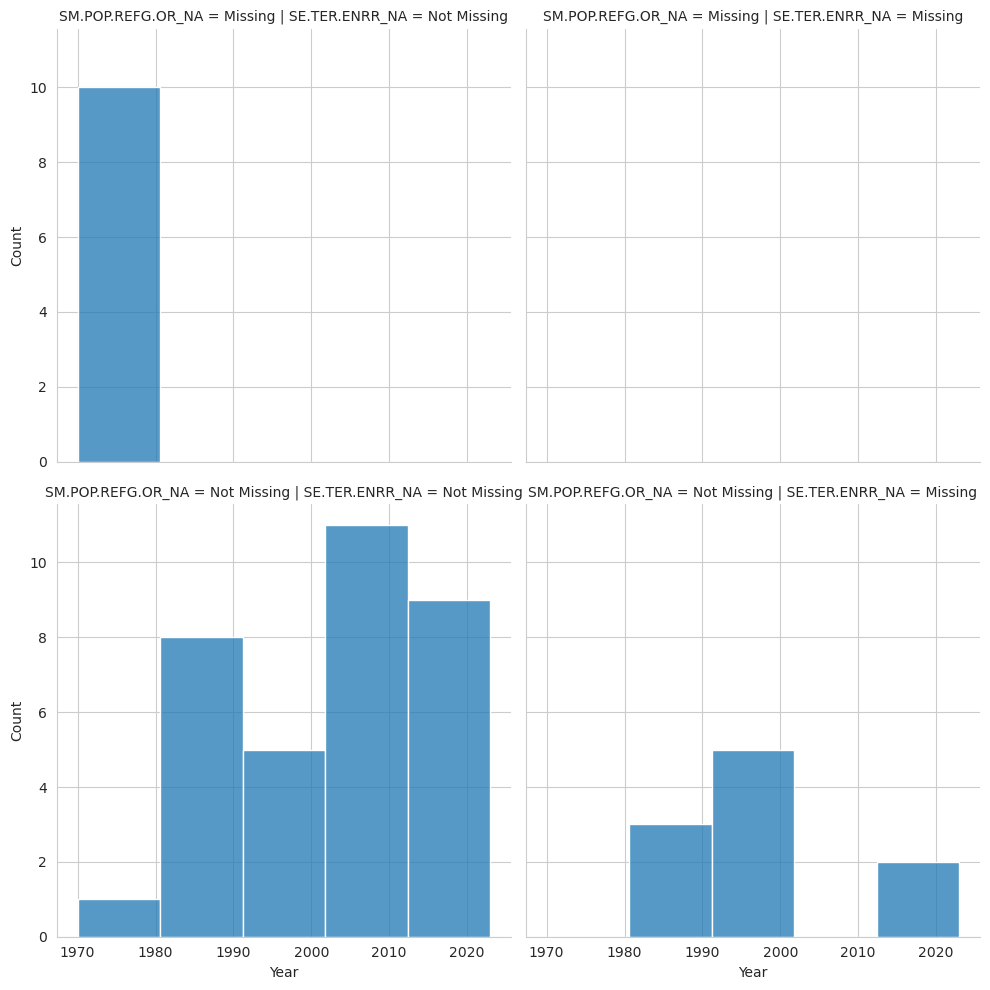

In [97]:
plot_2_missing_vs_variable(shadow_matrix,shadow_matrix.columns[0],columns_with_missing_values[0]+"_NA",columns_with_missing_values[1]+"_NA", bins=5)

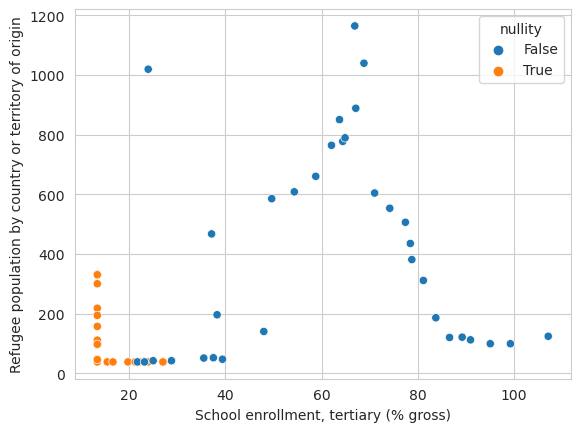

In [105]:
%run utils/u.0.1-df_functions.ipynb
plot_2_missing(shadow_matrix, columns_with_missing_values[0]+"_NA", columns_with_missing_values[1]+"_NA")

#### Imputation by mean

For a single value

/home/ubuntu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


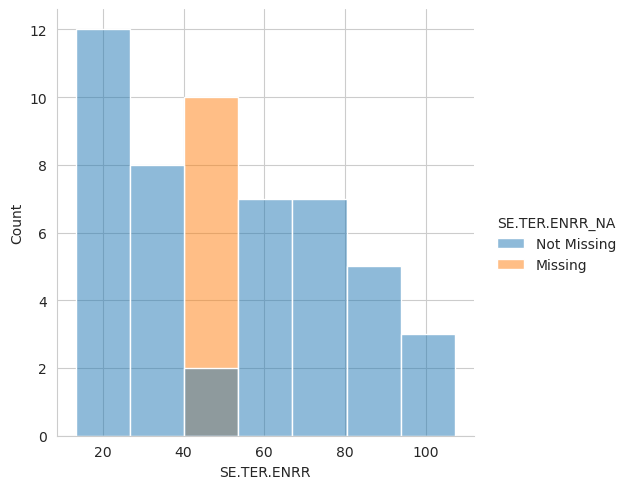

In [ ]:
imputation_of_missing_variable(shadow_matrix, columns_with_missing_values[0])


In [ ]:
arg_di_df_best_cases.to_csv('../data/processed/WDICSV_PROCESSED.csv', index=False)

In [3]:
session_info.show()